## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from google.colab import drive, files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers

## Import Datasets

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Showing first 5 elements from train set
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Showing first 5 elements from test set
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Printing number of samples
print('Number of Train Sample: ', train.shape[0])
print('Number of Test Sample: ', test.shape[0])

Number of Train Sample:  42000
Number of Test Sample:  28000


## Preprocessing

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

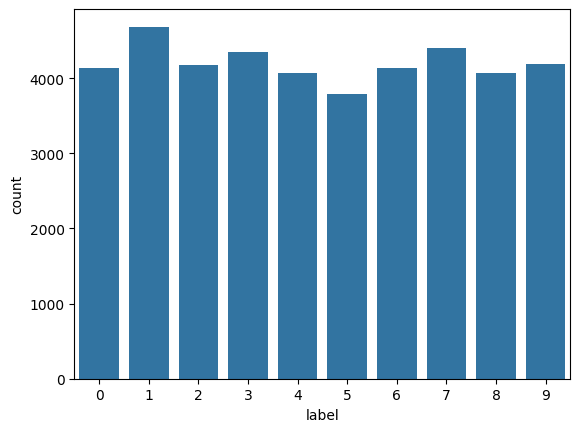

In [ ]:
# Preparing the target variable
Y_train = train["label"]

# Preparing the feature set
X_train = train.drop(labels = ["label"],axis = 1)

# Visualize distribution of target variable
sns.countplot(x=Y_train) # Bar plot
Y_train.value_counts() # Count of each class in y-axis

In [ ]:
# Check missing values
print('Missing Values Train-set :',train.isnull().values.any())
print('Missing Values Test-set :',test.isnull().values.any())

Missing Values Train-set : False
Missing Values Test-set : False


In [ ]:
# Data Normalization
X_train = X_train / 255.0
X_test = test / 255.0

# Data Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

# Encoding
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes = 10)

In [ ]:
# Data Splitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.1, random_state=7)

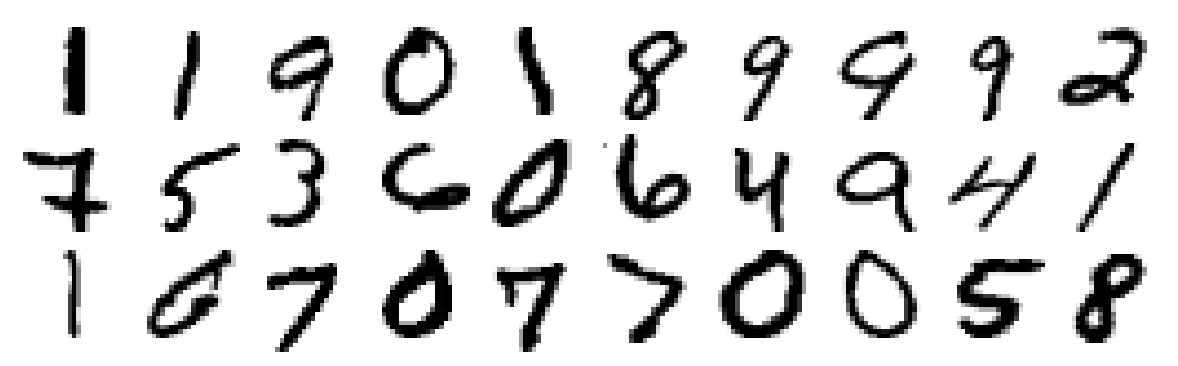

In [ ]:
# Preview the first 30 images
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
# Image augmentaion for better learning and performance of model
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
)

train_datagen.fit(X_train)

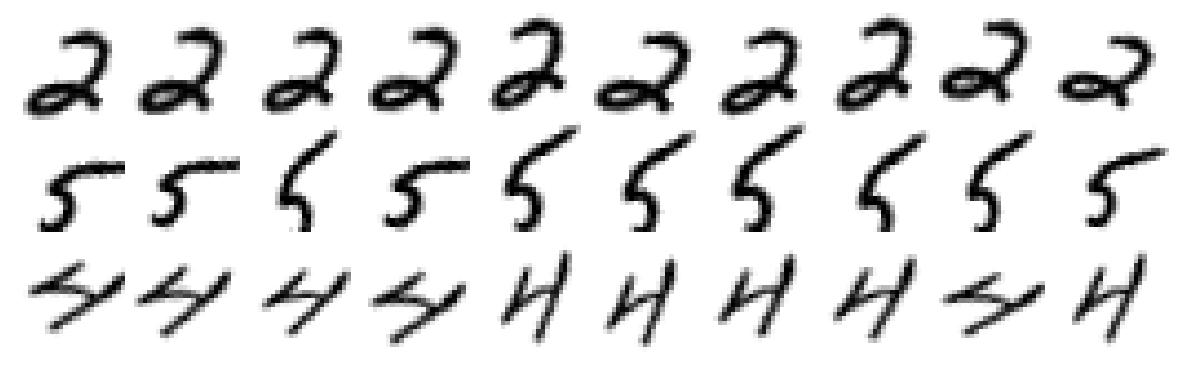

In [ ]:
# Preview 30 augmented images (10 augmented images for 3 original images in train set, each)
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = train_datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

## Define Model Architecture

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

## Model Compilation

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001,decay_steps=10000,decay_rate=0.9,staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

## Model Training

In [ ]:
batch_size = 82
epochs = 50

history = model.fit(train_datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=early_stop)

Epoch 1/50
460/460 - 311s - loss: 2.1933 - accuracy: 0.8866 - val_loss: 1.1550 - val_accuracy: 0.7736 - 311s/epoch - 677ms/step
Epoch 2/50
460/460 - 304s - loss: 0.4708 - accuracy: 0.9552 - val_loss: 0.3277 - val_accuracy: 0.9845 - 304s/epoch - 660ms/step
Epoch 3/50
460/460 - 306s - loss: 0.3739 - accuracy: 0.9622 - val_loss: 0.2927 - val_accuracy: 0.9845 - 306s/epoch - 665ms/step
Epoch 4/50
460/460 - 305s - loss: 0.3435 - accuracy: 0.9658 - val_loss: 0.2643 - val_accuracy: 0.9850 - 305s/epoch - 662ms/step
Epoch 5/50
460/460 - 301s - loss: 0.3292 - accuracy: 0.9671 - val_loss: 0.2840 - val_accuracy: 0.9819 - 301s/epoch - 654ms/step
Epoch 6/50
460/460 - 304s - loss: 0.3095 - accuracy: 0.9703 - val_loss: 0.2609 - val_accuracy: 0.9855 - 304s/epoch - 662ms/step
Epoch 7/50
460/460 - 302s - loss: 0.3147 - accuracy: 0.9706 - val_loss: 0.2565 - val_accuracy: 0.9855 - 302s/epoch - 656ms/step
Epoch 8/50
460/460 - 305s - loss: 0.2916 - accuracy: 0.9731 - val_loss: 0.2773 - val_accuracy: 0.9831 - 

## Model Evaluation

In [ ]:
results = np.zeros((X_test.shape[0],10))
results = results + model.predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("mnist_digit_recognizer.csv",index=False)

875/875 [==============================] - 62s 70ms/step


## Predictions

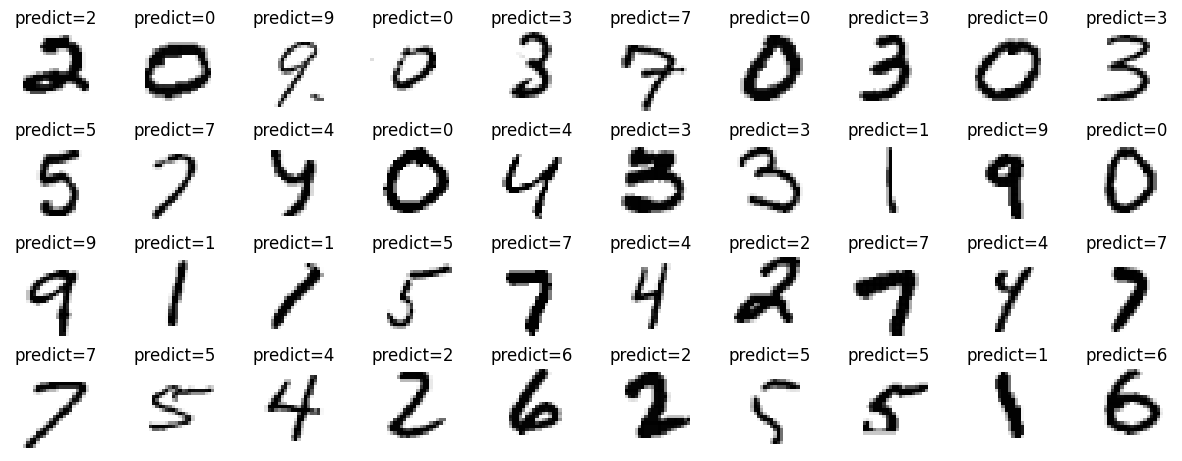

In [ ]:
# Preview Predictions
plt.figure(figsize=(15,6))
for i in range(40):
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, test, verbose=2)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

# # Predict the labels for the test set
# predictions = model.predict(X_test)

# # Convert the predictions from one-hot encoded format to class labels
# predicted_labels = np.argmax(predictions, axis=1)

# # Convert the true labels from one-hot encoded format to class labels (if Y_test is one-hot encoded)
# true_labels = np.argmax(test, axis=1)

# # Calculate accuracy
# accuracy = accuracy_score(true_labels, predicted_labels)
# print(f"Computed Test Accuracy: {accuracy}")

# # Number of samples to visualize
# num_samples = 20

# # Plot the first 'num_samples' test images and their predicted labels
# plt.figure(figsize=(15, 6))
# for i in range(num_samples):
#     plt.subplot(2, num_samples // 2, i + 1)
#     plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
#     plt.title(f"Pred: {predicted_labels[i]}")
#     plt.axis('off')
# plt.subplots_adjust(wspace=0.3, hspace=-0.1)
# plt.show()


### Testing custom input under process

In [ ]:
import cv2

test_img = cv2.imread("/content/img.png")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img = cv2.resize(test_img, (28, 28))
test_input = np.expand_dims(test_img, axis=0)

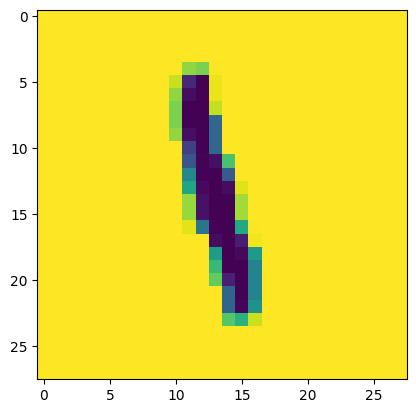

In [ ]:
plt.imshow(test_img)

In [ ]:
test_input = test_img.reshape((1,28,28,1))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 778ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.9474146e-25,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
var = (model.predict(test_input) > 0.5).astype("int32")

1/1 [==============================] - 0s 65ms/step


In [ ]:
# Define the class labels
class_labels = ["class_0", "class_1", "class_2", "class_3", "class_4",
                "class_5", "class_6", "class_7", "class_8", "class_9"]

# Get the predicted class index
predicted_class_index = np.argmax(var)

# Map the class index to the class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f"Predicted class: {predicted_class_label}")

Predicted class: class_8
